In [27]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn import datasets
import scipy as sc

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import joblib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
%qtconsole

---

### Table of Contents ###

* **Astoria to Manhattan Trip Duration Model**
    * Random Forrest Trip Distance from Astoria to Manhattan
        * Parameter Testing
* **Astoria to Astoria Trip Duration Model**
    * Random Forrest Trip Distance from Astoria to Astoria
* **Manhattan to Manhattan Trip Duration Model**
    * Random Forrest Trip Distance from Manhattan to Manhattan
* **Manhattan to Astoria Trip Duration Model**
    * Random Forrest Trip Distance from Manhattan to Manhattan
* **Functions**

---

# Astoria to Manhattan Trip Duration Model

In [28]:
filename =  'data/2016-06 astoria to manhattan.csv'
data_df = datamanip(filename,100)

Datamanip takes the raw data and extracts the features we are going to use as shown below:

In [116]:
data_df.head()

,weekday,hour,pickup_lon,pickup_lat,dropoff_lon,dropoff_lat,trip_distance,trip_duration,trip_cost
0,3.0,21.0,-73.931747,40.765339,-73.959785,40.761208,2.86,525.0,12.3
1,3.0,21.0,-73.921761,40.755619,-73.982079,40.773701,4.24,1008.0,17.3
2,3.0,21.0,-73.932167,40.759590,-73.971428,40.750622,3.01,803.0,14.3
3,3.0,21.0,-73.923149,40.755245,-73.978745,40.724388,5.62,1881.0,25.3
4,3.0,22.0,-73.930626,40.761154,-73.980583,40.741379,4.00,1205.0,18.3


Text(0.5, 1.0, 'Dropoff Points')

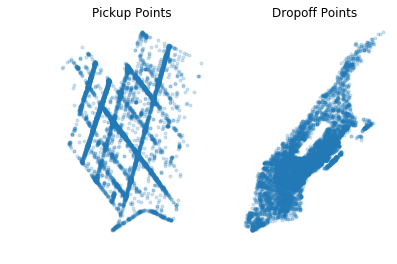

In [197]:
plt.subplot(121)
plt.plot(data_df.pickup_lon,data_df.pickup_lat,'.',alpha=.2)
plt.axis('off')
plt.title('Pickup Points')
plt.subplot(122)
plt.plot(data_df.dropoff_lon,data_df.dropoff_lat,'.',alpha=.2)
plt.axis('off')
plt.title('Dropoff Points')

In [183]:
data_df.to_csv('data/my astoria to manhattan.csv',index=False)

## Random Forrest Trip Distance from Astoria to Manhattan

In [30]:
data_df = pd.read_csv('data/my astoria to manhattan.csv')

In [31]:
feats = data_df.columns[0:6]
targs = data_df.columns[7:8]
features = pd.DataFrame(data_df[feats],columns=feats)
targets = pd.DataFrame(data_df[targs],columns=targs)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(features,targets,train_size=0.85)

/home/andrade/miniconda3/envs/via/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [33]:
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train),index=X_train.index.values,columns=X_train.columns.values)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),index=X_test.index.values,columns=X_test.columns.values)

In [151]:
rf = RandomForestRegressor(n_estimators=500,oob_score=True)

In [152]:
rf.fit(X_train_scaled,y_train.values[:,0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [194]:
predicted_train = rf.predict(X_train_scaled)
predicted_test = rf.predict(X_test_scaled)

test_score = r2_score(y_test.values, predicted_test)
spearman = spearmanr(y_test.values, predicted_test)
rmse = mean_squared_error(y_test.values,predicted_test)

print( 'R2 Score: {:0.2f}'.format(test_score))
print( 'Spearman Correlation: {:0.2f}'.format(spearman[0]))
print( 'Root Mean Square Error: {:0.2f}'.format(rmse))

R2 Score: 0.66
Spearman Correlation: 0.85
Root Mean Square Error: 142355.13


In [156]:
#joblib.dump(rf,'models/astoria to manhattan.joblib')
#scaler = joblib.dump(scaler,'models/astoria to manhattan scaler.joblib')

### Parameter Testing

In [154]:
ntr = [10,50,100,250,500,1000,1250,1500,2000]
test_score_ntr, spearman_ntr, rmse_ntr = testnestimator(ntr)

In [81]:
test_score_ar, spearman_ar, rmse_ar = testfeatureamount(1000)

Number of Chunks: 9; mod: 431


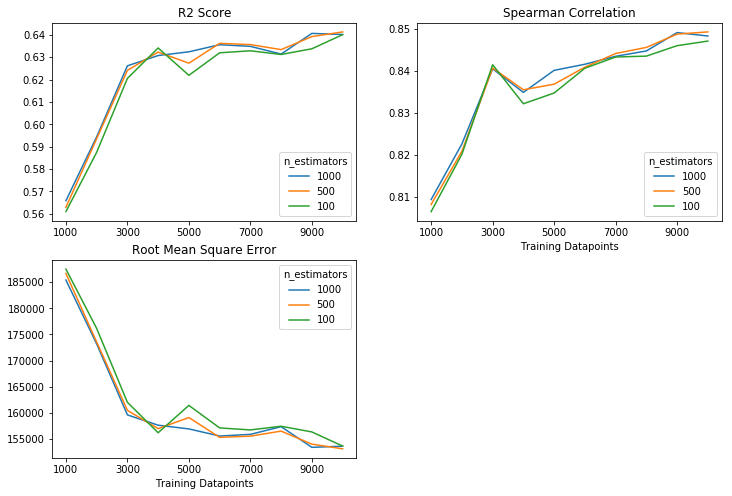

In [143]:
fig = plt.figure()
plt.subplot(221)
plt.plot(test_score_ar)
plt.plot(test_score_ar2)
plt.plot(test_score_ar3)
plt.title('R2 Score')
plt.xticks(range(0,9,2),range(1000,9001,2000))
#plt.xlabel('Training Datapoints')
plt.legend(['1000','500','100'],loc='lower right',title = 'n_estimators')

plt.subplot(222)
plt.plot(spearman_ar)
plt.plot(spearman_ar2)
plt.plot(spearman_ar3)
plt.title('Spearman Correlation')
plt.xticks(range(0,9,2),range(1000,9001,2000))
plt.xlabel('Training Datapoints')
plt.legend(['1000','500','100'],loc='lower right',title = 'n_estimators')

plt.subplot(223)
plt.plot(rmse_ar)
plt.plot(rmse_ar2)
plt.plot(rmse_ar3)
plt.title('Root Mean Square Error')
plt.xticks(range(0,9,2),range(1000,9001,2000))
plt.xlabel('Training Datapoints')
plt.legend(['1000','500','100'],loc='upper right',title = 'n_estimators')

size = fig.get_size_inches()*fig.dpi
fig.set_size_inches((size/fig.dpi)*2)

The amount of trees per forrest (**n_estimators**) doesn't have much affect on the model performance for this dataset.

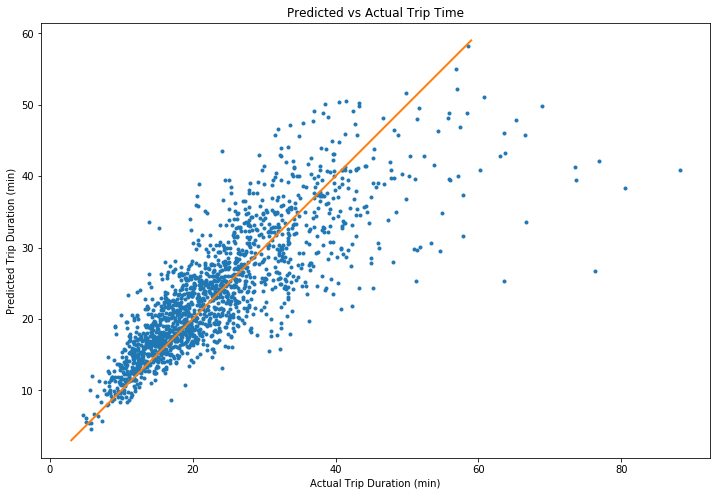

In [198]:
fig = plt.figure()
plt.plot(y_test/60,predicted_test/60,'.',alpha=1)
plt.xlabel('Actual Trip Duration (min)')
plt.ylabel('Predicted Trip Duration (min)')
plt.axis('equal')
plt.title('Predicted vs Actual Trip Time')
x = np.arange(3,60)
plt.plot(x,x,linewidth=2)

size = fig.get_size_inches()*fig.dpi
fig.set_size_inches((size/fig.dpi)*2)

We would expect to follow the linear line for predicted vs actual trip time for the best model.

---

# Astoria to Astoria Trip Duration Model

In [199]:
filename =  'data/2016-06 astoria to astoria.csv'
data_df = datamanip(filename,100)

In [71]:
data_df.head()

,weekday,hour,pickup_lon,pickup_lat,dropoff_lon,dropoff_lat,trip_distance,trip_duration,trip_cost
0,3.0,21.0,-73.914192,40.763432,-73.908089,40.762878,0.70,172.0,5.8
1,3.0,22.0,-73.930504,40.761318,-73.920120,40.757538,0.67,235.0,6.3
2,3.0,22.0,-73.918938,40.759148,-73.913719,40.762672,0.50,117.0,5.3
3,3.0,22.0,-73.931488,40.765308,-73.922531,40.763905,0.60,167.0,5.3
4,3.0,22.0,-73.925171,40.761921,-73.912224,40.767384,1.10,298.0,6.8


Text(0.5, 1.0, 'Dropoff Points')

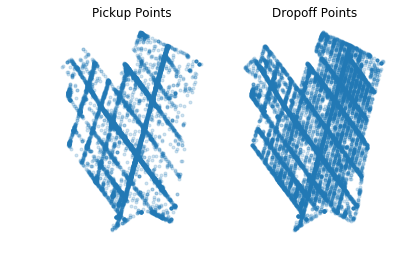

In [72]:
plt.figure()
plt.subplot(121)
plt.plot(data_df.pickup_lon,data_df.pickup_lat,'.',alpha=.2)
plt.axis('off')
plt.title('Pickup Points')
plt.subplot(122)
plt.plot(data_df.dropoff_lon,data_df.dropoff_lat,'.',alpha=.2)
plt.axis('off')
plt.title('Dropoff Points')

In [183]:
data_df.to_csv('data/my astoria to astoria.csv',index=False)

## Random Forrest Trip Distance from Astoria to Astoria

In [201]:
data_df = pd.read_csv('data/my astoria to astoria.csv')

In [203]:
feats = data_df.columns[0:6]
targs = data_df.columns[7:8]
features = pd.DataFrame(data_df[feats],columns=feats)
targets = pd.DataFrame(data_df[targs],columns=targs)

Played a little bit with creating a strait line disten feature to improve model

In [34]:
dlon = features.pickup_lon-features.dropoff_lon
dlat = features.pickup_lat-features.dropoff_lat
dist = np.sqrt(dlon**2+dlat**2)
#features = features.drop(columns=['dropoff_lon','dropoff_lat'])
features['distance'] = dist

In [204]:
X_train, X_test, y_train, y_test = train_test_split(features,targets,train_size=0.75)

/home/andrade/miniconda3/envs/via/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [205]:
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train),index=X_train.index.values,columns=X_train.columns.values)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),index=X_test.index.values,columns=X_test.columns.values)

In [214]:
rf = RandomForestRegressor(n_estimators=500,oob_score=True)
rf.fit(X_train_scaled,y_train.values[:,0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [215]:
predicted_train = rf.predict(X_train_scaled)
predicted_test = rf.predict(X_test_scaled)

test_score = r2_score(y_test.values, predicted_test)
spearman = spearmanr(y_test.values, predicted_test)
rmse = mean_squared_error(y_test.values,predicted_test)

print( 'R2 Score: {:0.2f}'.format(test_score))
print( 'Spearman Correlation: {:0.2f}'.format(spearman[0]))
print( 'Root Mean Square Error: {:0.2f}'.format(rmse))

R2 Score: 0.14
Spearman Correlation: 0.62
Root Mean Square Error: 52144.77


In [216]:
joblib.dump(rf,'models/astoria to astoria.joblib')
joblib.dump(scaler,'models/astoria to astoria scaler.joblib')

['astoria to astoria scaler.joblib']

In [218]:
test_score_ar_aa, spearman_ar_aa, rmse_ar_aa = testfeatureamount(1000)

Number of Chunks: 16; mod: 69


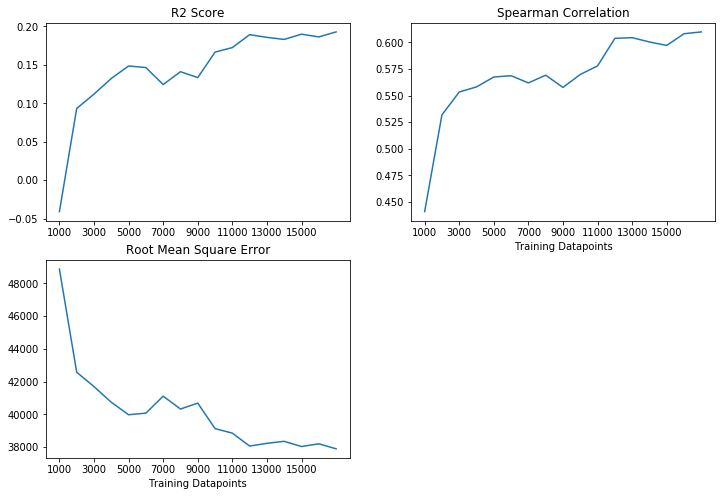

In [222]:
fig = plt.figure()
plt.subplot(221)
plt.plot(test_score_ar_aa)
#plt.plot(test_score_ar2)
#plt.plot(test_score_ar3)
plt.title('R2 Score')
plt.xticks(range(0,16,2),range(1000,15001,2000))
#plt.xlabel('Training Datapoints')
#plt.legend(['1000','500','100'],loc='lower right',title = 'n_estimators')

plt.subplot(222)
plt.plot(spearman_ar_aa)
#plt.plot(spearman_ar2)
#plt.plot(spearman_ar3)
plt.title('Spearman Correlation')
plt.xticks(range(0,16,2),range(1000,15001,2000))
plt.xlabel('Training Datapoints')
#plt.legend(['1000','500','100'],loc='lower right',title = 'n_estimators')

plt.subplot(223)
plt.plot(rmse_ar_aa)
#plt.plot(rmse_ar2)
#plt.plot(rmse_ar3)
plt.title('Root Mean Square Error')
plt.xticks(range(0,16,2),range(1000,15001,2000))
plt.xlabel('Training Datapoints')
#plt.legend(['1000','500','100'],loc='upper right',title = 'n_estimators')

size = fig.get_size_inches()*fig.dpi
fig.set_size_inches((size/fig.dpi)*2)

---

# Manhattan to Manhattan Trip Duration Model

In [119]:
filename =  'data/2016-06 manhattan to manhattan.csv'
data_df = datamanip(filename,100,6)

KeyboardInterrupt: 

The datamanip file actually averages the data to a week in order to try to make this dataset more manageable.

In [231]:
data_df.head()

,weekday,hour,pickup_lon,pickup_lat,dropoff_lon,dropoff_lat,trip_distance,trip_duration,trip_cost
0,3,21,-73.983360,40.760937,-73.977463,40.753979,0.79,392,7.3
1,3,21,-73.994316,40.751072,-74.004234,40.742168,1.26,394,7.8
2,3,21,-73.982361,40.773891,-73.929466,40.851540,7.39,1774,27.3
3,3,21,-73.987106,40.733173,-73.985909,40.766445,3.10,1007,14.8
4,3,21,-73.995201,40.739491,-73.993202,40.762642,2.17,765,11.8


Text(0.5, 1.0, 'Dropoff Points')

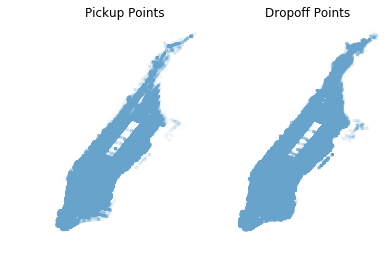

In [122]:
plt.figure()
plt.subplot(121)
plt.plot(data_df.pickup_lon,data_df.pickup_lat,'.',alpha=.01)
plt.axis('off')
plt.title('Pickup Points')
plt.subplot(122)
plt.plot(data_df.dropoff_lon,data_df.dropoff_lat,'.',alpha=.01)
plt.axis('off')
plt.title('Dropoff Points')

In [21]:
data_df.to_csv('data/my manhattan to manhattan week.csv',index=False)

In [183]:
data_df.to_csv('data/my manhattan to manhattan.csv',index=False)

# Random Forrest Trip Distance from Manhattan to Manhattan

In [223]:
data_df = pd.read_csv('data/my manhattan to manhattan week.csv')

In [224]:
#feats = data_df_tues.columns[0:6]
#targs = [data_df_tues.columns[7]]
feats = data_df.columns[0:6]
targs = [data_df.columns[7]]
#targs = data_df.columns[7:9]
features = pd.DataFrame(data_df[feats],columns=feats)
targets = pd.DataFrame(data_df[targs],columns=targs)

In [225]:
X_train, X_test, y_train, y_test = train_test_split(features,targets,train_size=0.75)

/home/andrade/miniconda3/envs/via/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [226]:
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train),index=X_train.index.values,columns=X_train.columns.values)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),index=X_test.index.values,columns=X_test.columns.values)

/home/andrade/miniconda3/envs/via/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [227]:
rf = RandomForestRegressor(n_estimators=200,oob_score=True)

In [228]:
n = 20000
myrange = range(n)
rf.fit(X_train_scaled.iloc[myrange],y_train.values[myrange,0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [229]:
predicted_train = rf.predict(X_train_scaled)
predicted_test = rf.predict(X_test_scaled)

test_score = r2_score(y_test.values, predicted_test)
spearman = spearmanr(y_test.values, predicted_test)
rmse = mean_squared_error(y_test.values,predicted_test)

print( 'R2 Score: {:0.2f}'.format(test_score))
print( 'Spearman Correlation: {:0.2f}'.format(spearman[0]))
print( 'Root Mean Square Error: {:0.2f}'.format(rmse))

R2 Score: 0.65
Spearman Correlation: 0.83
Root Mean Square Error: 90389.48


In [24]:
joblib.dump(rf,'models/manhattan to manhattan.joblib')
joblib.dump(scaler,'models/manhattan to manhattan scaler.joblib')

['models/manhattan to manhattan scaler.joblib']

---

# Manhattan to Astoria Trip Duration Model

In [123]:
filename =  'data/2016-06 manhattan to astoria.csv'
data_df = datamanip(filename,100)

In [124]:
data_df.head()

,weekday,hour,pickup_lon,pickup_lat,dropoff_lon,dropoff_lat,trip_distance,trip_duration,trip_cost
0,3.0,21.0,-73.969627,40.760506,-73.925705,40.765392,3.40,780.0,14.3
1,3.0,21.0,-73.974136,40.751408,-73.917786,40.756348,3.70,915.0,15.3
2,3.0,21.0,-74.012794,40.702412,-73.927872,40.766338,9.20,1600.0,30.3
3,3.0,21.0,-73.979866,40.745049,-73.905991,40.764133,5.58,1336.0,20.3
4,3.0,21.0,-73.963387,40.761681,-73.908623,40.759487,3.60,640.0,13.8


Text(0.5, 1.0, 'Dropoff Points')

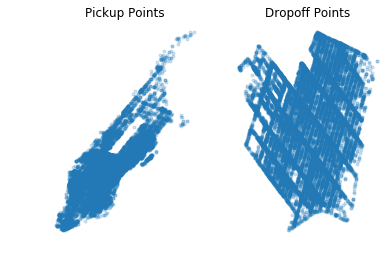

In [127]:
plt.figure()
plt.subplot(121)
plt.plot(data_df.pickup_lon,data_df.pickup_lat,'.',alpha=.2)
plt.axis('off')
plt.title('Pickup Points')
plt.subplot(122)
plt.plot(data_df.dropoff_lon,data_df.dropoff_lat,'.',alpha=.2)
plt.axis('off')
plt.title('Dropoff Points')

In [130]:
data_df.to_csv('data/my manhattan to astoria.csv',index=False)

## Random Forrest Trip Distance from Manhattan to Astoria

In [232]:
data_df = pd.read_csv('data/my manhattan to astoria.csv')

In [233]:
feats = data_df.columns[0:6]
targs = [data_df.columns[7]]
#feats = data_df.columns[0:6]
#targs = [data_df.columns[7]]
#targs = data_df.columns[7:9]
features = pd.DataFrame(data_df[feats],columns=feats)
targets = pd.DataFrame(data_df[targs],columns=targs)

In [234]:
X_train, X_test, y_train, y_test = train_test_split(features,targets,train_size=0.75)

/home/andrade/miniconda3/envs/via/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [235]:
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train),index=X_train.index.values,columns=X_train.columns.values)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),index=X_test.index.values,columns=X_test.columns.values)

In [236]:
rf = RandomForestRegressor(n_estimators=300,oob_score=True)

In [237]:
rf.fit(X_train_scaled,y_train.values[:,0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [238]:
predicted_train = rf.predict(X_train_scaled)
predicted_test = rf.predict(X_test_scaled)

test_score = r2_score(y_test.values, predicted_test)
spearman = spearmanr(y_test.values, predicted_test)
rmse = mean_squared_error(y_test.values,predicted_test)

print( 'R2 Score: {:0.2f}'.format(test_score))
print( 'Spearman Correlation: {:0.2f}'.format(spearman[0]))
print( 'Root Mean Square Error: {:0.2f}'.format(rmse))

R2 Score: 0.59
Spearman Correlation: 0.80
Root Mean Square Error: 121503.08


In [140]:
joblib.dump(rf,'models/manhattan to astoria.joblib')
joblib.dump(scaler,'models/manhattan to astoria scaler.joblib')

['models/manhattan to astoria scaler.joblib']

---

# Functions

In [26]:
def datamanip(filename,sigma,weekstart=0):
    dataframe = pd.read_csv(filename, sep=',')
    
    pickup_time = np.array([datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in dataframe.pep_pickup_datetime])
    dropoff_time = np.array([datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in dataframe.pep_dropoff_datetime])
    dataframe['trip_duration'] = [(down-up).seconds for down,up in zip(dropoff_time,pickup_time)]
    
    if weekstart != 0:
        week = [(x.day >= weekstart) and (x.day < (weekstart+7)) for x in pickup_time]
        dataframe = dataframe.loc[week]
        pickup_time = np.array([pickup_time[i] for i,x in enumerate(week) if x])
        #dropoff_time = np.array([dropoff_time[i] for i,x in enumerate(week) if x])
    
    thresh = dataframe.trip_duration/60 <= sigma
    dataframe_thresh = dataframe.loc[thresh] # dataframe.trip_duration/60 <= sigma]
    pickup_time = np.array([pickup_time[i] for i,x in enumerate(thresh) if x])
    #pickup_time = np.array([datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in dataframe_thresh.pep_pickup_datetime])
    #dropoff_time = np.array([dropoff_time[i] for i,x in enumerate(thresh) if x])
    
    weekday_hour = np.array([[x.weekday(),x.hour] for x in pickup_time])
    trip_cost = np.array([charge-tip for charge,tip in zip(dataframe_thresh.total_amount,dataframe_thresh.tip_amount)])
    data = np.array([weekday_hour[:,0],weekday_hour[:,1],dataframe_thresh.pickup_longitude,dataframe_thresh.pickup_latitude,dataframe_thresh.dropoff_longitude,dataframe_thresh.dropoff_latitude,dataframe_thresh.trip_distance,dataframe_thresh.trip_duration,trip_cost]).T
    data_dic = ['weekday','hour','pickup_lon','pickup_lat','dropoff_lon','dropoff_lat','trip_distance','trip_duration','trip_cost']
    
    return pd.DataFrame(data,columns=data_dic)

In [83]:
def testfeatureamount(chunk,end=0):

    pd.DataFrame(data_df[feats],columns=feats)
    #chunk = 1000
    featnum = X_train_scaled.shape[0]
    div = int(featnum/chunk)
    mod = featnum%chunk
        
    if end == 0:
        end = div+1
    
    test_score = np.zeros(end)
    spearman = np.zeros(end)
    pearson = np.zeros(end)
    oob_score = np.zeros(end)
    rmse = np.zeros(end)
    mape = np.zeros(end)
    print('Number of Chunks: ' + str(div) + '; mod: ' + str(mod))
       
    for i in range(end):
        st = 0
        en = (i+1)*chunk
        if i == (div):
            en = (div*chunk)+mod
        myrange = range(st,en)
        temp_X_train = X_train_scaled.iloc[myrange]
        temp_y_train = y_train.values[myrange,0]
        rf.fit(temp_X_train,temp_y_train)
    
        predicted_test = rf.predict(X_test_scaled.iloc[0:chunk])
        oob_score[i] = rf.oob_score_
        test_score[i] = r2_score(y_test.values[0:chunk,0], predicted_test)
        spearman[i] = spearmanr(y_test.values[0:chunk,0], predicted_test)[0]
        pearson[i] = pearsonr(y_test.values[0:chunk,0],predicted_test)[0]
        rmse[i] = mean_squared_error(y_test.values[0:chunk,0],predicted_test)
        #mape[i] = np.mean(np.abs((y_test.values[0:chunk,0] - predicted_test) / y_test.values[0:chunk,0]))
        
        print(f'Test data R-2 score: {test_score[i]:>5.3}' + '; chunk: ' + str(i),end='\r')

    return test_score, spearman, rmse

In [148]:
def testnestimator(ntr,chunk=0):

#ntr = [10,50,100,250,500,1000,1250,1500,2000]

    end = len(ntr)

    test_score = np.zeros(end)
    spearman = np.zeros(end)
    rmse = np.zeros(end)

    if chunk == 0:
        chunk = X_train_scaled.shape[0]

    myrange = np.arange(chunk)
    temp_X_train = X_train_scaled.iloc[myrange]
    temp_y_train = y_train.values[myrange,0]

    for i in range(end):
        rt = RandomForestRegressor(n_estimators=ntr[i],oob_score=True)
        rf.fit(temp_X_train,temp_y_train)
    
        predicted_test = rf.predict(X_test_scaled)

        test_score[i] = r2_score(y_test.values, predicted_test)
        spearman[i] = spearmanr(y_test.values, predicted_test)[0]
        rmse[i] = mean_squared_error(y_test.values,predicted_test)
    
        print(f'Test data R-2 score: {test_score[i]:>5.3}' + '; i: ' + str(i),end='\r')
    
    return test_score, spearman, rmse